# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df = pd.DataFrame(total_data)
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.shape

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.isnull

<bound method DataFrame.isnull of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [6]:
duplicates = df.duplicated(subset='host_id', keep=False)

# Filter the DataFrame to show only duplicated rows based on 'host_id'
df_duplicates = df[duplicates]

# Display the duplicated rows
print(df_duplicates.sort_values(by='host_id'))

             id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
21556  17263207   Brooklyn home.  Comfort and clean. Liguria room.       2787   
13963  10593675  La Spezia room.  Clean, quiet and comfortable bed       2787   
13583  10160215                               Torre del Lago Room.       2787   
13688  10267242  Cinque Terre Room.  Clean and Quiet Queen Bedroom       2787   
...         ...                                                ...        ...   
48687  36384346             ✨Superior King Room , Manhattan  View✨  273392981   
48696  36388492                    ✨Premier King Room , City View✨  273392981   
48648  36354796                     ✨Superb King Room , City View✨  273392981   
48811  36445224                  Big & Beautiful room with 2 beds!  274012871   
48863  36469741                Comfortable & Big room with 2 beds!  274012871   

               host_name ne

In [7]:
# addressing duplicates with the dataset

print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

'''
Replicated Name records is difficult to remove as it could simply mean that an Airbnb host has multiple listings and therefore appears various times.
After browsing the host_id duplicates the same appears to be happening, still valuable to the EDA as they represents a separate listing within the same
property or location under the same host.  The id doens't have any duplicates and serves little purpose, let's drop it.
'''

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


"\nReplicated Name records is difficult to remove as it could simply mean that an Airbnb host has multiple listings and therefore appears various times.\nAfter browsing the host_id duplicates the same appears to be happening, still valuable to the EDA as they represents a separate listing within the same\nproperty or location under the same host.  The id doens't have any duplicates and serves little purpose, let's drop it.\n\n"

In [8]:
# ridding of columns not pertaining to my predictive analysis
df.drop(["id", "host_id", "name", "last_review", "reviews_per_month", "host_name", "latitude", "longitude", "availability_365"], axis= 1, inplace= True)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,Kensington,Private room,149,1,9,6
1,Manhattan,Midtown,Entire home/apt,225,1,45,2
2,Manhattan,Harlem,Private room,150,3,0,1
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2
48891,Brooklyn,Bushwick,Private room,40,4,0,2
48892,Manhattan,Harlem,Entire home/apt,115,10,0,1
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,6


In [9]:
df.nunique()

neighbourhood_group                 5
neighbourhood                     221
room_type                           3
price                             674
minimum_nights                    109
number_of_reviews                 394
calculated_host_listings_count     47
dtype: int64

In [10]:
# Different types of 'rooms' available
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [11]:
# Analysis of prices
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
print(f"The least expensive property is {min_price}, while the most expensive is {max_price}.  Finally, the average price within the data set is {mean_price}")

# Replacing the 10 listings with a value of 0 for price with the median price ($152.72)
df['price'] = df['price'].replace(0, mean_price)

The least expensive property is 0, while the most expensive is 10000.  Finally, the average price within the data set is 152.7206871868289



price_range
0-50           5016
51-100        16850
101-150       10033
151-200        7211
201-250        3559
251-300        2308
301-500        2683
501-1000        937
1001-2000       188
2001-4000        75
4001-6000        17
6001-8000        10
8001-10000        5
Name: count, dtype: int64


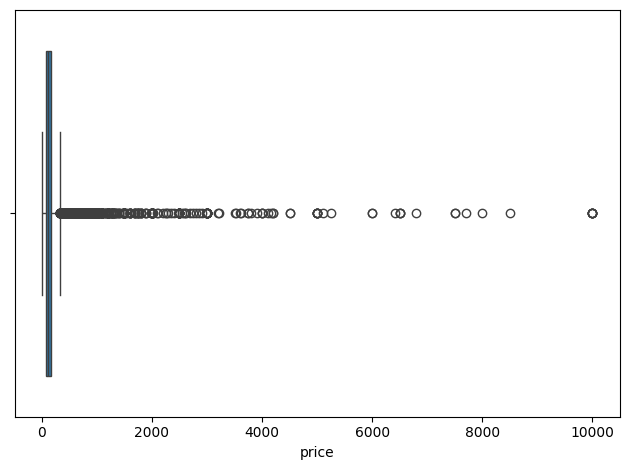

In [12]:
sns.boxplot(x=df['price'])

# Looking into the ranges of prices
bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000' ]
df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)
value_counts = df['price_range'].value_counts().sort_index()
plt.tight_layout()
print()
print(value_counts)

In [13]:
'''
Experimenting and noting various sorted datasets by price, mimumum nights, etc. whether ascending or descending.
  Various private rooms for $3000-9000 per night?! I think not.
'''

df[df['price'].duplicated()].sort_values(by='price', ascending=False).head(25)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,price_range
29238,Manhattan,Upper West Side,Entire home/apt,10000.0,30,0,1,NaN
17692,Brooklyn,Greenpoint,Entire home/apt,10000.0,5,5,1,NaN
40433,Manhattan,Lower East Side,Entire home/apt,9999.0,30,0,1,8001-10000
12342,Manhattan,Lower East Side,Private room,9999.0,99,6,1,8001-10000
45666,Brooklyn,East Flatbush,Private room,7500.0,1,8,2,6001-8000
48043,Manhattan,Tribeca,Entire home/apt,6500.0,180,0,1,6001-8000
37194,Manhattan,Upper West Side,Private room,6500.0,30,0,1,6001-8000
15560,Manhattan,Greenwich Village,Entire home/apt,6000.0,1,0,1,6001-8000
4345,Brooklyn,Bedford-Stuyvesant,Private room,5000.0,6,10,1,4001-6000
25825,Brooklyn,Cypress Hills,Entire home/apt,5000.0,2,4,1,4001-6000


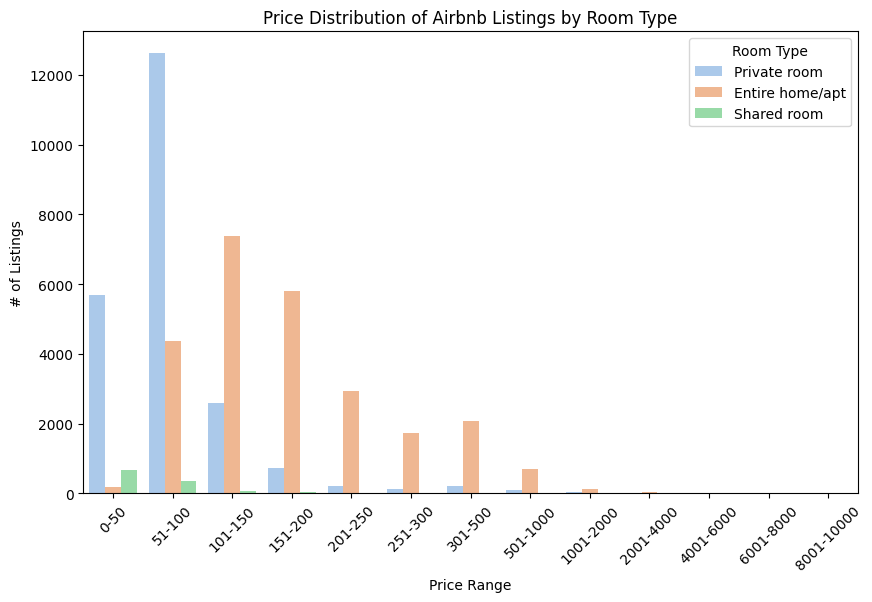

In [14]:
# Now let us separate the distinct categorical types of rentals and their data; shared room, private room, or the entire apartment.
df['room_type_encoded'], unique_room_types = pd.factorize(df['room_type'])

bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000' ]

df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels)

# Filter for 'Private room' and 'Entire home/apt' only
filtered_df = df[df['room_type'].isin(['Shared Room', 'Private Room', 'Entire Home/Apt'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range', hue='room_type_encoded', palette='pastel')

plt.legend(title='Room Type', labels=unique_room_types)
plt.xticks(rotation=45)
plt.title('Price Distribution of Airbnb Listings by Room Type')
plt.xlabel('Price Range')
plt.ylabel('# of Listings')

plt.show()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

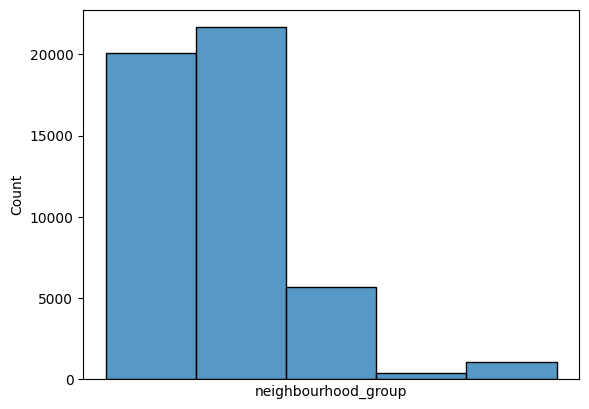

In [15]:
# Histogram of neighborhood groups
sns.histplot(data = df, x = "neighbourhood_group").set_xticks([])
# Where these properties are located throughout NY
df['neighbourhood_group'].value_counts()

In [16]:
'''
From Monday:
You should have familiarized yourself with the dataset. This includes:
- Identifying your target column (in other words: what feature do we want our model to try to predict?)
     
- Inspect the data type of columns and cast columns to the correct data type as necessary
- Develop some visualizations as needed

What the focus for today should be:
1) Split your dataset into train/test sets first!!
2) Impute missing values in both your train and test sets using metrics that were calculated from your train set
3) Scale columns if necessary for both your train and test sets using metrics that were calculated from your train set.
4) Impute outliers if necessary but remember to use metrics from the train set!!
5) Feature selection
'''

'\nFrom Monday:\nYou should have familiarized yourself with the dataset. This includes:\n- Identifying your target column (in other words: what feature do we want our model to try to predict?)\n     \n- Inspect the data type of columns and cast columns to the correct data type as necessary\n- Develop some visualizations as needed\n\nWhat the focus for today should be:\n1) Split your dataset into train/test sets first!!\n2) Impute missing values in both your train and test sets using metrics that were calculated from your train set\n3) Scale columns if necessary for both your train and test sets using metrics that were calculated from your train set.\n4) Impute outliers if necessary but remember to use metrics from the train set!!\n5) Feature selection\n'